In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [157]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [158]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [159]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [160]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [161]:
# Encoding
df["Classes"]=np.where(df['Classes'].str.contains('not fire'),0,1)
df['Classes'].unique()

array([0, 1])

In [162]:
# drop month day and year
df.drop(['month','day','year'],axis=1,inplace=True)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [163]:
#  dependent and independent features
x=df.drop(['FWI'],axis=1)
y=df['FWI']

In [164]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [165]:
print(x_train.shape)
print(x_test.shape)

(182, 11)
(61, 11)


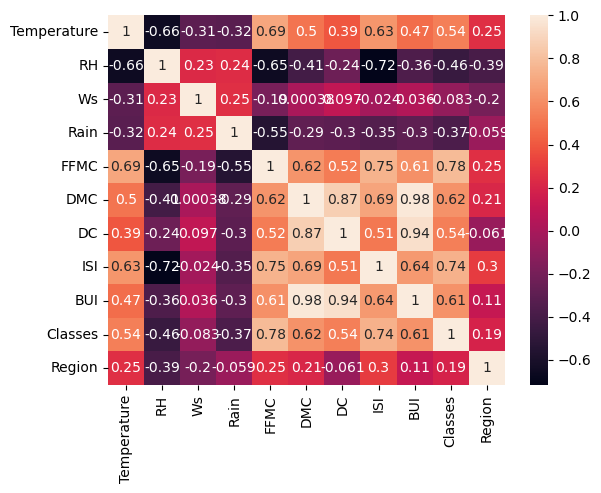

In [166]:
# correlation
corr=x_train.corr()
plt.Figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

In [167]:
# checking for high +ve collinearity and removing that specific columns
def correlation(dataset,threshold):
    col_corr=set() #set is taken so only unique values are given as output
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
         if abs(corr_matrix.iloc[i,j]>threshold): #checking if the absolute valyue of the ith,jth position value is greater than input threshold value
            colname=corr_matrix.columns[i]
            col_corr.add(colname)
    return col_corr

In [168]:
corr_features=correlation(x_train,0.85)

In [169]:
# drop features with correlation > 85
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [170]:
print(x_train.shape)  #previously there were 11 columns in both train and test dataset
print(x_test.shape)


(182, 9)
(61, 9)


In [171]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scalered=scaler.fit_transform(x_train)  #always use fit_transform for training data and transform for test data
x_test_scalered=scaler.transform(x_test)



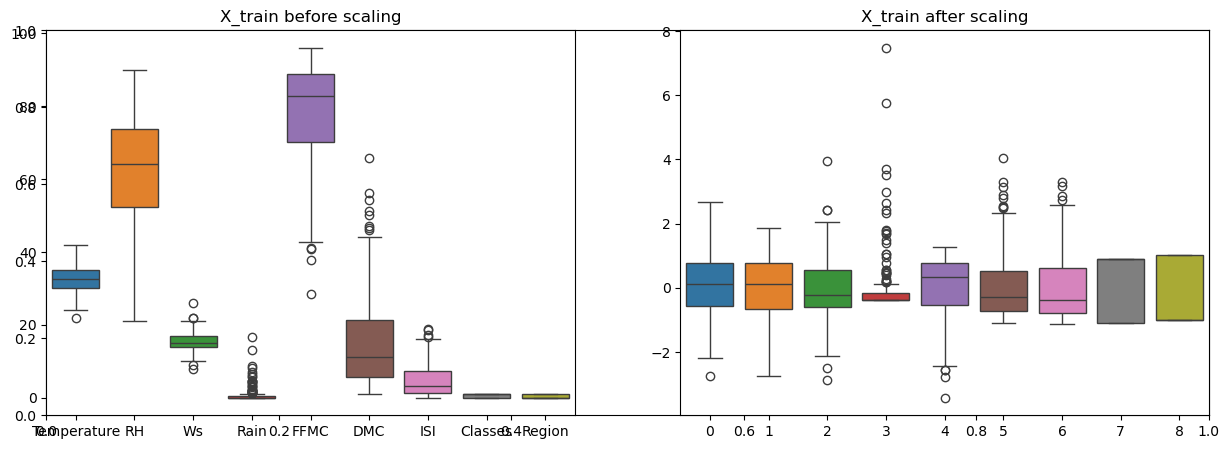

In [172]:
# box plot to see effect of scaling

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scalered)
plt.title('X_train after scaling')
plt.show()


## LINEAR REGRESIION

In [173]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train_scalered,y_train)


LinearRegression()

In [174]:
#  computing MAE

from sklearn.metrics import mean_absolute_error
y_pred=regression.predict(x_test_scalered)
mae=mean_absolute_error(y_test,y_pred)
mae

0.5468236465249993

In [175]:
#  r2_ score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9847657384266951

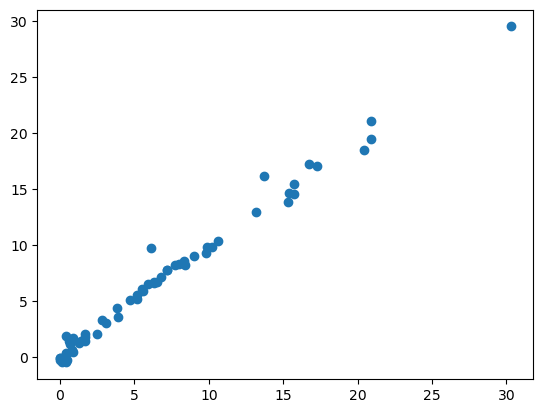

In [176]:
plt.scatter(y_test,y_pred)   #to see the relation of predicted and test values
plt.show()

In [177]:
# lasso regression

from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scalered,y_train)

from sklearn.metrics import mean_absolute_error
y_pred=lasso.predict(x_test_scalered)
mae=mean_absolute_error(y_test,y_pred)
print(mae)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score



1.1331759949144085


0.9492020263112388

In [178]:
# ridge regression

from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scalered,y_train)

from sklearn.metrics import mean_absolute_error
y_pred=ridge.predict(x_test_scalered)
mae=mean_absolute_error(y_test,y_pred)
print(mae)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score


0.5642305340105712


0.9842993364555513

In [179]:
# elasticnet regression

from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
elasticnet.fit(x_train_scalered,y_train)

from sklearn.metrics import mean_absolute_error
y_pred=elasticnet.predict(x_test_scalered)
mae=mean_absolute_error(y_test,y_pred)
print(mae)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score


1.8822353634896


0.8753460589519703

## CROSS VALIDATION


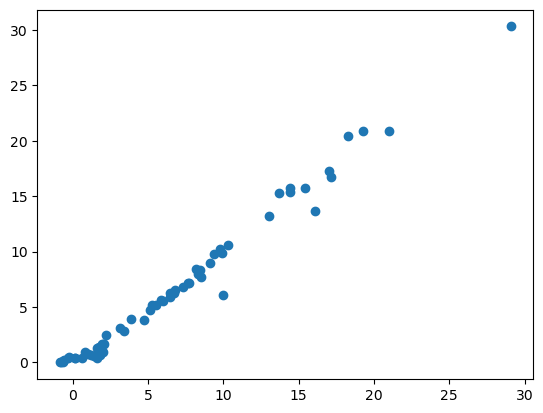

In [184]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scalered,y_train)
y_pred=lassocv.predict(x_test_scalered)
plt.scatter(y_pred,y_test)
plt.show()

In [185]:
# shows the selected alpha value
lassocv.alpha_

0.05725391318234408

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred=lassocv.predict(x_test_scalered)
mae=mean_absolute_error(y_test,y_pred)
print(mae)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.6199701158263432


0.9820946715928275

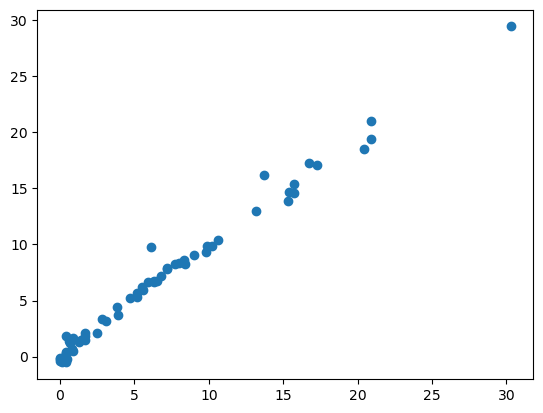

In [187]:
# ridge cross validation
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scalered,y_train)
y_pred=ridgecv.predict(x_test_scalered)
plt.scatter(y_test,y_pred)
plt.show()

In [188]:
from sklearn.metrics import mean_absolute_error
y_pred=ridgecv.predict(x_test_scalered)
mae=mean_absolute_error(y_test,y_pred)
print(mae)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.5642305340105712


0.9842993364555513

In [189]:
ridgecv.alpha_

1.0

In [190]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [192]:
# to get parameters of ridgecv
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

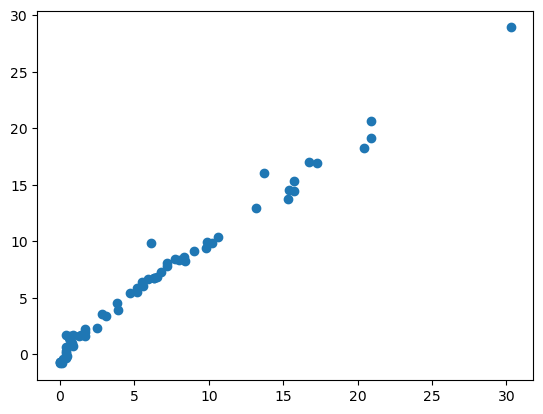

In [193]:
# ealstic net cv
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)   #l1_ratio means that basically the model needs to focus 50% on l1 norm(ridge) and the other 50% on l2 norm(lasso)
elasticcv.fit(x_train_scalered,y_train)
y_pred=elasticcv.predict(x_test_scalered)
plt.scatter(y_test,y_pred)
plt.show()

In [194]:
from sklearn.metrics import mean_absolute_error
y_pred=elasticcv.predict(x_test_scalered)
mae=mean_absolute_error(y_test,y_pred)
print(mae)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.6575946731430905


0.9814217587854941

In [195]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [197]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11